In [248]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import math

In [249]:
# describe the model
def deriv(y, t, N, gamma, alpha, delta, phi, omega):
    S, E, I, R, B, H, D, C = y
    dSdt = -B * S * I / N + alpha * R   # susceptible-compartment 
    dEdt = B * S * I / N - delta * E   # exposed-compartment
    dIdt = delta * E - (1 - phi) * gamma * I - phi * omega * I   # infected-compartment
    dRdt = (1 - phi) * gamma * I - alpha * R   # recovered-compartment 
    dDdt = phi * omega * I   # dead-compartment 
    dCdt = 0.05 * dIdt * 1 / 10  # intensive care, 5 % of the infected require intensive care, 10 days from infected to critically ill
    def dBdt(t):   # varying transmission rate 
        return 1 / 50 * math.cos(t / 20) if 230 < t < 330 else B * (-1 / 0.7 * math.sin(2 * math.pi / 700))   # adding a second wave
        #return 0 if t < 200 else B * (-1 / 0.7 * math.sin(2 * math.pi / 70))   # lockdown after 200 days  
    #dBdt = 0   # constant transmission rate
    dHdt = 0   # healthcare's COVID-19 capacity
    return dSdt, dEdt, dIdt, dRdt, dBdt(t), dHdt, dDdt, dCdt

Some notes regarding constant beta: 
- Remember to change dBdt(t) to dBdt in the return statement.
- You change beta by changing the initial condition. 
- Increase beta = more total interaction between people; a more socially engaged society
- Decrease beta = policy measurses, better hand washing, cough protection, less face touching etc. 


In [250]:
# describe the parameters
N = 10336399          # population of Sweden (January 2020 source: www.scb.se)
delta = 1.0 / 5.0     # incubation period of five days 
D = 7.0               # number of days that an infected person has and can spread the disease
gamma = 1.0 / D       # removal rate 
alpha = 1 / 180       # immunity lost after six months
phi = 0.02            # 2 % fatality rate (number of deaths from disease / number of confirmed cases of disease * 100)
omega = 1 / 14        # 14 days from infection until death 

S0, E0, I0, R0, B0, H0, D0, C0 = N-1, 1, 0, 0, 1, 680, 0, 0  # initial conditions: one infected, rest susceptible, initial transmission rate B=3, 680 intensive care spots, zero dead, zero in critical condition

In [251]:
t = np.linspace(0, 365, 366) # Grid of time points (in days)
y0 = S0, E0, I0, R0, B0, H0, D0, C0 # Initial conditions vector

# Integrate the SEIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, gamma, alpha, delta, phi, omega))
S, E, I, R , B, H, D, C = ret.T

In [252]:
def plotseir(t, S, E, I, R, D):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')  
  ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
  ax.plot(t, D, 'c', alpha=0.7, linewidth=2, label='Dead')

  ax.set_xlabel('Time (days)')

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.savefig("Plot.png")
  plt.show();

plot the graph

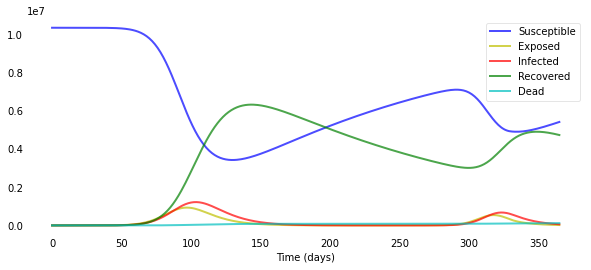

In [253]:
plotseir(t, S, E, I, R, D)

In [254]:
def plothealthcare(t, H, C):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, C, 'r', alpha=0.7, linewidth=2, label='Number of people requiring critical care')
  ax.plot(t, H, 'o', alpha=0.7, linewidth=2, label='Healthcare capacity') 

  ax.set_xlabel('Time (days)')

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.savefig("Plot_healthcare.png")
  plt.show();

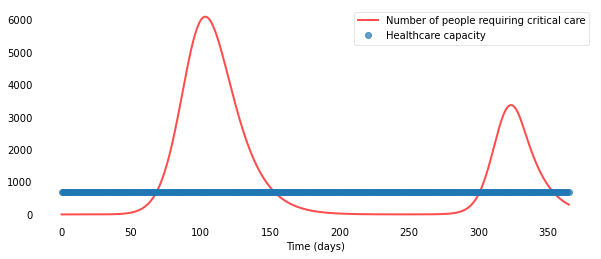

In [255]:
plothealthcare(t, H, C)

In [256]:
def plottransmission(t, B):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, B, 'b', alpha=0.7, linewidth=2, label='Transmission')

  ax.set_xlabel('Time (days)')

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.savefig("Plot.png")
  plt.show();

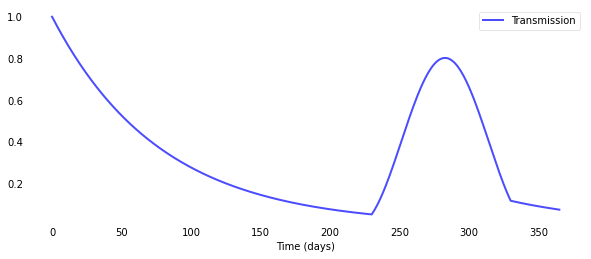

In [257]:
plottransmission(t, B)